In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


images_dir = Path('/content/drive/MyDrive/kaggle/rice/newricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(224,224))
    
    images.append(image_resized)
    target.append(i)

target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.3,random_state=109)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
base_model.trainable = False

In [5]:
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)


In [6]:
dataAugmentaion = ImageDataGenerator(rotation_range = 40, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.2, height_shift_range = 0.2)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [8]:
history=model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 16),
 validation_data = (X_test, y_test), steps_per_epoch = len(X_train) // 16,
 epochs = 30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
16/16 [==============================] - 41s 2s/step - loss: 2.5337 - accuracy: 0.4632 - val_loss: 1.4135 - val_accuracy: 0.6036
Epoch 2/30
16/16 [==============================] - 35s 2s/step - loss: 0.6816 - accuracy: 0.8165 - val_loss: 0.7677 - val_accuracy: 0.7387
Epoch 3/30
16/16 [==============================] - 34s 2s/step - loss: 0.6211 - accuracy: 0.7995 - val_loss: 0.6431 - val_accuracy: 0.7658
Epoch 4/30
16/16 [==============================] - 34s 2s/step - loss: 0.5489 - accuracy: 0.8165 - val_loss: 1.0200 - val_accuracy: 0.6396
Epoch 5/30
16/16 [==============================] - 34s 2s/step - loss: 0.4279 - accuracy: 0.8385 - val_loss: 0.6927 - val_accuracy: 0.7297
Epoch 6/30
16/16 [==============================] - 34s 2s/step - loss: 0.3172 - accuracy: 0.8774 - val_loss: 0.5637 - val_accuracy: 0.8108
Epoch 7/30
16/16 [==============================] - 34s 2s/step - loss: 0.3414 - accuracy: 0.8717 - val_loss: 0.5480 - val_accuracy: 0.8198
Epoch 8/30
16/16 [==

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('inception_model.h5')

In [10]:
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[[1.42819679e-03 5.08198857e-01 4.87955213e-01 4.11401066e-04
  2.00633984e-03]
 [1.09600916e-03 9.69378710e-01 2.48458332e-06 7.46330670e-06
  2.95152068e-02]
 [9.93397713e-01 6.57589315e-03 1.17230420e-05 1.60420529e-06
  1.30848857e-05]
 [1.11804646e-03 4.09589056e-03 2.04386234e-01 3.01401342e-05
  7.90369630e-01]
 [1.94401946e-06 8.16320244e-05 1.22650050e-07 9.99511957e-01
  4.04424558e-04]
 [2.62503279e-03 9.97374535e-01 1.07081917e-07 2.49677441e-07
  1.70782855e-07]
 [7.89027652e-08 7.75959776e-08 5.37718515e-05 9.84356263e-10
  9.99946117e-01]
 [6.21776376e-03 6.37713492e-01 1.45400455e-03 9.48211382e-05
  3.54519993e-01]
 [3.04722931e-07 1.71353549e-05 7.19699411e-10 9.99982238e-01
  3.67051086e-07]
 [2.16684979e-03 3.79326522e-01 6.18153512e-01 6.33003292e-05
  2.89814867e-04]
 [5.79128682e-04 9.99420643e-01 3.47461473e-08 1.07942867e-07
  1.34443326e-07]
 [2.72755392e-06 2.73317426e-07 3.41214403e-03 2.81369394e-09
  9.96584773e-01]
 [8.21206925e-07 9.999

In [11]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob
import os


def load_image(filename):
    img = cv2.imread(os.path.join(filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img

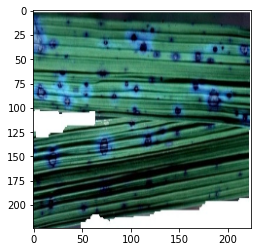

Predicted Disease is Leaf Smut


In [18]:
import matplotlib.pyplot as plt


%matplotlib inline
img = load_image('/content/drive/MyDrive/kaggle/rice/newricedisease/Leaf Smut/Copy of DSC_0516.jpg')
p = model.predict(np.asarray([img]))[0]
plt.imshow(img)    
plt.show()
k = target_names
class_idx = np.argmax(p)
s = [str(i) for i in p] 
a = int(class_idx) 
print("Predicted Disease is", k[a])